# Find a Legend Challenge - Starter Notebook

link:  https://xeek.ai/challenges/extract-crossplot-markers

In [2]:
### Add team name and model name here ###
team_name = 'Team_name' 
model_name = 'model_name'

## Introduction
    Througout the scientific community, a vast amount of information is contained within figures in papers, reports, and books. Without the raw data, this information can be lost altogether. We can increase our collective knowledge as a community if we develop a way to extract this information and convert it to a useful format for agregation and downstream analysis.

## Problem statement
    Plot legend
    
    The goal of this challenge is to be able to extract the plot elements from the legend into a datatable. Elements in the legend will be listed in the order they appear on the legend and will be separated by a space. 
    
    Ex:['Type A' 'Type B' 'Type C'] 

## Data description
    1. Image files containing one graph per file.
    2. CSV file containing the image file name and legend elements. These labels are to be used to train and test the model on the associated graphs.

## Shared imports

In [3]:
# %pip install opencv-python

In [4]:
import os
import cv2
import json
import random as rnd
import copy
import re
import platform
import sys

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from glob import glob
from pprint import pprint
from sklearn import metrics

## Dataset paths

In [5]:
DATA_ROOT = "./raw_data/helvetios_challenge_dataset_training/"
IMAGE_DATASET_PATH = f"{DATA_ROOT}/images"
LABELS_DATA_PATH = f"{DATA_ROOT}/labels" 

In [6]:
PROCESSED_DATASET_PATH=f"{DATA_ROOT}/processed"
MODELS_ROOT_PATH=f"./models"
MODEL_PATH=f"{MODELS_ROOT_PATH}/{model_name}"

## Data file exploration

In [7]:
def read_image_filenames(path):
    extensions = ["*.png"]
    image_filenames = []
    for ext in extensions:
        image_filenames.extend(glob(os.path.join(path, ext)))
    return image_filenames

In [8]:
image_filenames = read_image_filenames(IMAGE_DATASET_PATH) 

In [9]:
pprint(image_filenames[0:5]) 

['./raw_data/helvetios_challenge_dataset_training//images\\20220915194538484039.png',
 './raw_data/helvetios_challenge_dataset_training//images\\20220915194540522606.png',
 './raw_data/helvetios_challenge_dataset_training//images\\20220915194541155437.png',
 './raw_data/helvetios_challenge_dataset_training//images\\20220915194541753054.png',
 './raw_data/helvetios_challenge_dataset_training//images\\20220915194542124279.png']


In [10]:
def read_label_filenames(path):
    extensions = ["*.csv"]
    label_filenames = []
    for ext in extensions:
        label_filenames.extend(glob(os.path.join(path, ext)))
    return label_filenames

In [11]:
label_filenames = read_label_filenames(LABELS_DATA_PATH) 

In [12]:
pprint(label_filenames) 

['./raw_data/helvetios_challenge_dataset_training//labels\\labels.csv']


## Import data labels

In [13]:
def import_labels (label):
    labels = pd.read_csv(label[0])
    return labels

In [14]:
labels = import_labels(label_filenames)

## Preview data
    Here are the first 5 examples of the labels. Each row corresponds to a different graph.

In [26]:
pprint(labels.head())

                sample_name                           legend
0  20220915194538484039.png                              NaN
1  20220915194540522606.png               ['DC' 'mode' 'HI']
2  20220915194541155437.png                    ['KY' 'user']
3  20220915194541753054.png             ['B' 'hat' 'AZ' 'C']
4  20220915194542124279.png  ['ALSK' 'LA' 'Limestone' 'DEL']


## Image import

In [16]:
def read_image(image_filenames):
    image = cv2.imread(image_filenames) 
    return cv2.cvtColor(image, cv2.COLOR_BGR2RGB) 

## Preview selected images

In [17]:
def preview_images(image_filenames):
    figsize=(20,20)
    nrows = len(image_filenames)
    ncols = 1
    fig, (axes) = plt.subplots(nrows, ncols, figsize=figsize, dpi=120)

    for i in range(nrows):
        img_filename = image_filenames[i]
        image = read_image(img_filename)

        axis = axes[i] if nrows > 1 else axes
        axis.imshow(image)

        title = os.path.basename(img_filename)
        axis.set_title(title)

    plt.show()

In [18]:
PREVIEW_IMAGES_COUNT=5
rnd.seed(101)
preview_image_filenames=rnd.sample(image_filenames, k=PREVIEW_IMAGES_COUNT)
pprint(preview_image_filenames)

['./raw_data/helvetios_challenge_dataset_training//images\\20220915195213265094.png',
 './raw_data/helvetios_challenge_dataset_training//images\\20220915194725948124.png',
 './raw_data/helvetios_challenge_dataset_training//images\\20220915195133494139.png',
 './raw_data/helvetios_challenge_dataset_training//images\\20220915194913546759.png',
 './raw_data/helvetios_challenge_dataset_training//images\\20220915195033918368.png']


One way to tackle this problem is to consider the coordinates of the image elements. Here are the first 5 graphs as an example. Each graph is saved as separate png file.

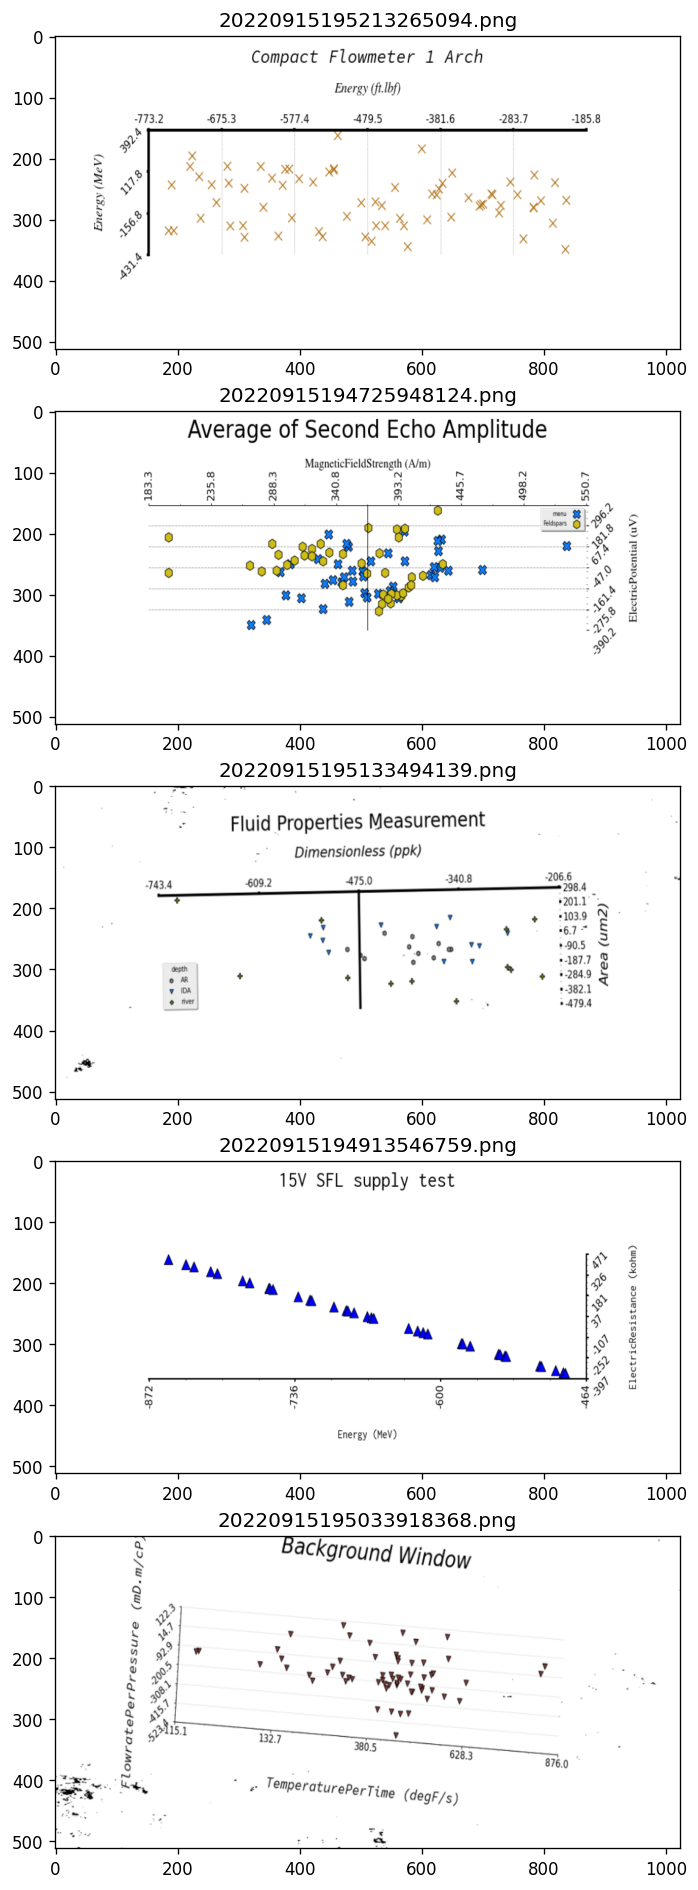

In [19]:
preview_images(preview_image_filenames) 

## Potential pipeline code
    The following code can be used to create your model pipeline. These functions outline suggested steps to help create the model. These functions are suggestions and you may change or edit as you see fit to create the desired functionality.


## Data processing

In [23]:
X_train = np.empty((len(image_filenames), len(read_image(image_filenames[0]).flatten())), np.float32)
X_train_imgnames = []
for i in range(len(image_filenames)):
    img = read_image(image_filenames[i]).flatten()
    file_name = image_filenames[i].split("\\")[-1]
    X_train[i] = img/255
    X_train_imgnames.append(file_name)

In [21]:
X_train = np.array([])
X_train_imgnames = []
for i in range(len(image_filenames)):
    img = read_image(image_filenames[i]).flatten()
    file_name = image_filenames[i].split("\\")[-1]
    X_train = np.append(X_train, img/255)
    X_train_imgnames.append(file_name)

KeyboardInterrupt: 

In [24]:
X_train

array([[1.       , 1.       , 1.       , ..., 1.       , 1.       ,
        1.       ],
       [1.       , 1.       , 1.       , ..., 1.       , 1.       ,
        1.       ],
       [1.       , 1.       , 1.       , ..., 1.       , 1.       ,
        1.       ],
       ...,
       [1.       , 1.       , 1.       , ..., 1.       , 1.       ,
        1.       ],
       [1.       , 1.       , 1.       , ..., 1.       , 1.       ,
        1.       ],
       [0.9607843, 0.9607843, 0.9607843, ..., 0.9607843, 0.9607843,
        0.9607843]], dtype=float32)

In [ ]:
def process_data(image_dataset_path, PROCESSED_DATASET_PATH):
   """
   Includes splitting, scaling, or extracting features from raw source images, which can then be used to train the model.    
   """
   ### PUT YOUR CODE HERE ###
   
   pass

## Dataset split

In [ ]:
def split_dataset(PROCESSED_DATASET_PATH, labels):
    """
    Split dataset files into train and test datasets.
    Depending on your method of data processing, model training, and model testing, we recommend a method that doesn't copy/move images.
    Instead, it returns lists of image filenames per each dataset. Modify subsequent code to match your method.
    """    
    train_image_filenames = []
    train_labels = []
    test_image_filenames = []
    test_labels = []
    
    ### PUT YOUR CODE HERE ###
    
    return train_image_filenames, train_labels, test_image_filenames, test_labels

## Model train

In [ ]:
def train_model(train_image_filenames, train_labels, MODEL_PATH):
      
   """
   Train your model on provided graphs and labels.
   """
      
   ### PUT YOUR CODE HERE ###
   
   pass

## Model test

In [ ]:
def test_model(test_image_filenames, test_labels,  MODEL_PATH):

    ### PUT YOUR CODE HERE ###
    
    """
    Test your model's performance here on the split provided data. It may be helpful to define some metrics to evaluate the model's performance. 
    Note: submissions will be evaluated based on lenshtein distance of the predictions and key.
    """


    metrics = {}
    
    return metrics

## Model inference

In [ ]:
def run_inference(image_filenames, MODEL_PATH):
    
    """
    Add functions defined above to run inference on unlabeled data. This function will be used to for the final submission of the notebook and evaluation. 
    The function should return predictions_sample_name and predicted_legend.
    
    Currently, arguments include the model path and image filenames. Please edit the inputs in the submission inference pipeline below if you utilize another method.
    """

    ### PUT YOUR CODE HERE ####
    predictions_sample_name = []
    predicted_legend = []
    
    
    ### Remove and add your model results here ###
    predictions_sample_name = labels.sample_name
    predicted_legend = labels.legend
    
    return predictions_sample_name, predicted_legend
    

## Submission inference pipeline

    Model generated predicted_legend will be compared to known values. Results will be evaluated based on the inference time, levenshtein distance, and F1 score of the model predictions. If you modified the inputs/outputs of previously listed functions, correct the following pipeline so it can handle images unknown to the user. 
    
    The function needs to produce a CSV file containing the columns "sample_name" and "legend".
    
    The pip freeze print can be used to help make the environment requirements file (requirements.txt).

In [ ]:
from time import perf_counter

In [ ]:
TEST_DATA_ROOT = "./test_dataset"
TEST_IMAGE_DATASET_PATH = f"{TEST_DATA_ROOT}/images"
TEST_LABELS_DATA_PATH = f"{TEST_DATA_ROOT}/labels"
TEST_INFERENCE_RESULTS_PATH = f"{TEST_DATA_ROOT}/inference_results"

In [ ]:
def run_inference_pipeline(TEST_IMAGE_DATASET_PATH, TEST_INFERENCE_RESULTS_PATH, PROCESSED_DATASET_PATH, MODEL_PATH):
   
   print("Runing inference with parameters:")
   print(f"* OS                          : {platform.system()}, {platform.release()}")
   python_version = str(sys.version).replace('\n', ' ')
   print(f"* Python version              : {python_version}")
   print("\n-- pip freeze start ---")
   !pip freeze
   print("-- pip freeze end ---")

   os.makedirs(TEST_INFERENCE_RESULTS_PATH, exist_ok=True)
   
   image_filenames = read_image_filenames(TEST_IMAGE_DATASET_PATH)
         
   ts_start = perf_counter()
   
   process_data(TEST_IMAGE_DATASET_PATH, PROCESSED_DATASET_PATH)
   
   ts_after_processing = perf_counter()

   predictions_sample_name, predicted_legend = run_inference(image_filenames, MODEL_PATH) 
   
   ts_after_test = perf_counter()
   
   Processing_time_s = ts_after_processing-ts_start
   Inference_time_s = ts_after_test-ts_after_processing
   
   print(f"Processing time: {ts_after_processing-ts_start:.2f} sec.")
   print(f"Inference time: {ts_after_test-ts_after_processing:.2f} sec.")
   
   
   inference_results = {'sample_name': predictions_sample_name,
                        'legend': predicted_legend}
   inference_results_df = pd.DataFrame(inference_results)
      
   inference_results_df.to_csv(f"{TEST_INFERENCE_RESULTS_PATH}/{team_name}_{model_name}_results.csv", index = False)
   
   print(inference_results_df)

   print(f"The submission file   : {TEST_INFERENCE_RESULTS_PATH}/{team_name}_{model_name}_results.csv")
    


In [ ]:
run_inference_pipeline(
   TEST_IMAGE_DATASET_PATH,     
   TEST_INFERENCE_RESULTS_PATH, 
   PROCESSED_DATASET_PATH, 
   MODEL_PATH)

NameError: name 'TEST_IMAGE_DATASET_PATH' is not defined

## Submission

Upload the inference results CSV file under the challenge on http://xeek.ai/ to score your model and update the leaderboard. Finalist will be invited to submit their notebook for final review and scoring.